In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [98]:
data = pd.read_csv("../data/raw/heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [99]:
data.shape

(918, 12)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [101]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [102]:
data.drop_duplicates()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [103]:
data.shape

(918, 12)

In [104]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [105]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<Axes: xlabel='MaxHR', ylabel='Count'>

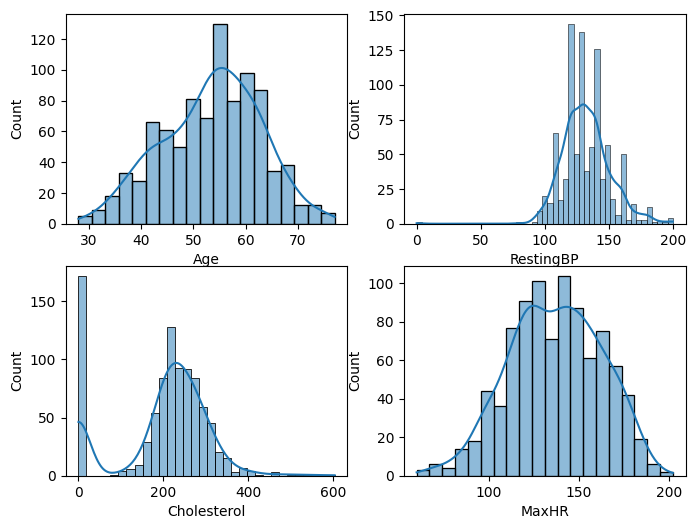

In [106]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.histplot(data['Age'],kde=True)
plt.subplot(2,2,2)
sns.histplot(data['RestingBP'],kde=True)
plt.subplot(2,2,3)
sns.histplot(data['Cholesterol'],kde=True)
plt.subplot(2,2,4)
sns.histplot(data['MaxHR'],kde=True)


In [107]:
cholestrol_mean = data.loc[data['Cholesterol'] !=0, 'Cholesterol'].mean()
cholestrol_mean

np.float64(244.6353887399464)

In [108]:
data['Cholesterol'] = data['Cholesterol'].replace(0,cholestrol_mean)
data['Cholesterol'].value_counts()

Cholesterol
244.635389    172
254.000000     11
220.000000     10
223.000000     10
204.000000      9
             ... 
353.000000      1
278.000000      1
157.000000      1
176.000000      1
131.000000      1
Name: count, Length: 222, dtype: int64

In [109]:
RestingBP_mean = data.loc[data['RestingBP'] !=0, 'RestingBP'].mean()
RestingBP_mean

np.float64(132.54089422028352)

In [110]:
data['RestingBP'] = data['RestingBP'].replace(0,RestingBP_mean)
data['RestingBP'].value_counts()

RestingBP
120.0    132
130.0    118
140.0    107
110.0     58
150.0     55
        ... 
101.0      1
117.0      1
192.0      1
129.0      1
164.0      1
Name: count, Length: 67, dtype: int64

<Axes: xlabel='MaxHR', ylabel='Count'>

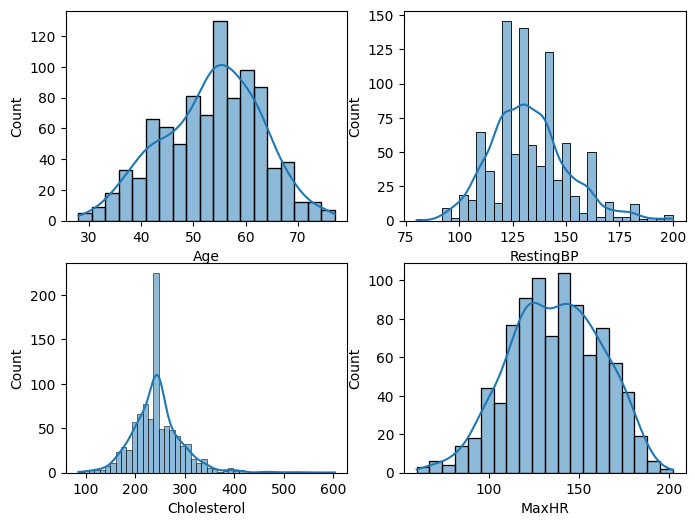

In [111]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.histplot(data['Age'],kde=True)
plt.subplot(2,2,2)
sns.histplot(data['RestingBP'],kde=True)
plt.subplot(2,2,3)
sns.histplot(data['Cholesterol'],kde=True)
plt.subplot(2,2,4)
sns.histplot(data['MaxHR'],kde=True)


In [112]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


<Axes: xlabel='Sex', ylabel='count'>

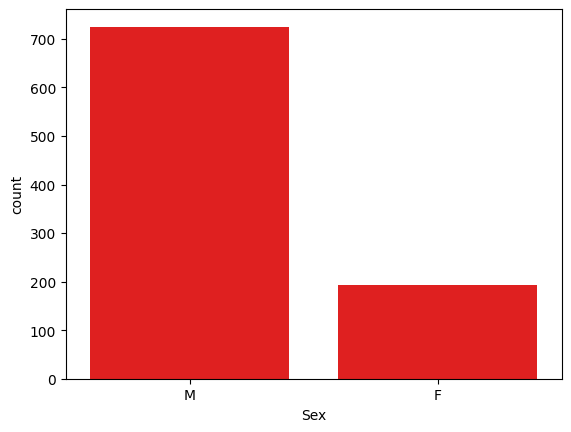

In [113]:
sns.countplot(x='Sex', data=data, color='red')

<Axes: xlabel='ChestPainType', ylabel='count'>

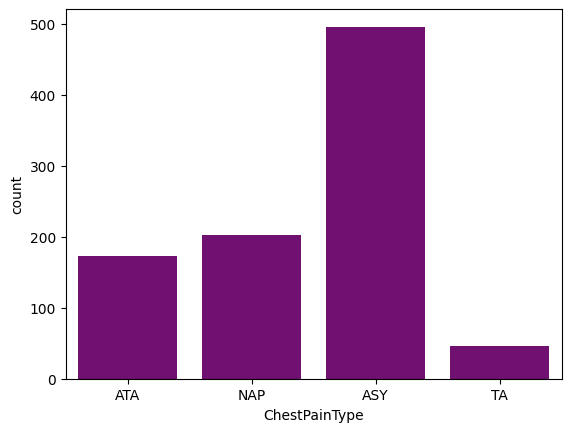

In [114]:
sns.countplot(x='ChestPainType', data=data, color='purple')

<Axes: xlabel='FastingBS', ylabel='count'>

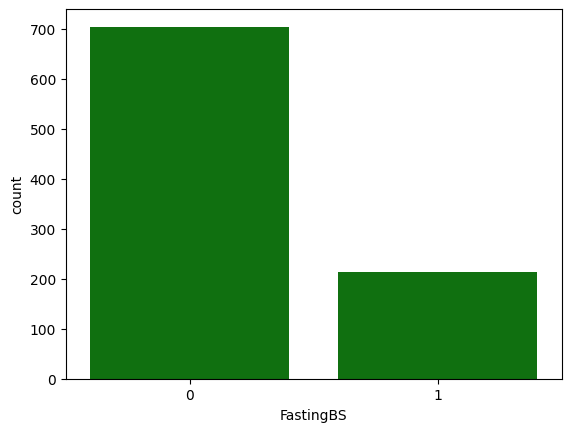

In [115]:
sns.countplot(x='FastingBS', data=data, color='green')

<Axes: xlabel='RestingECG', ylabel='count'>

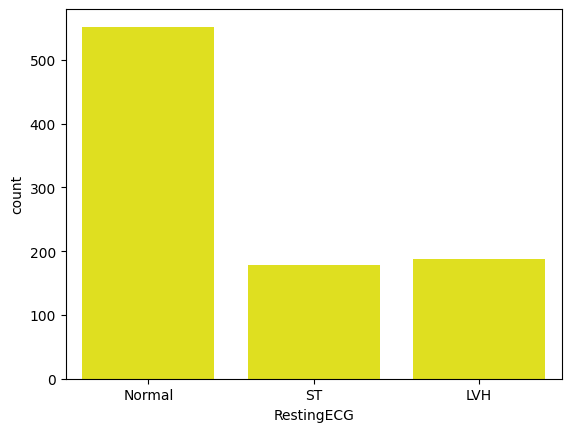

In [116]:
sns.countplot(x='RestingECG', data=data, color='yellow')

<Axes: xlabel='ExerciseAngina', ylabel='count'>

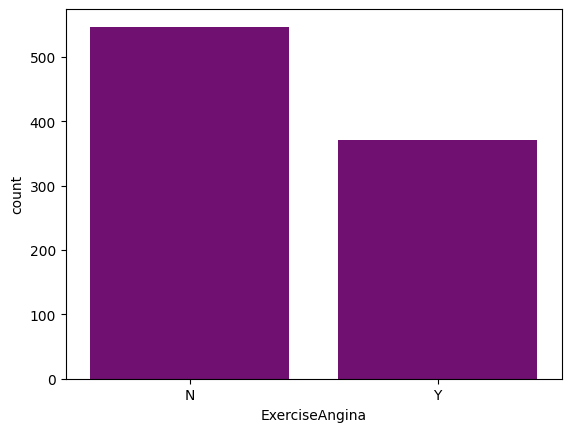

In [117]:
sns.countplot(x='ExerciseAngina', data=data, color='purple')

<Axes: xlabel='ST_Slope', ylabel='count'>

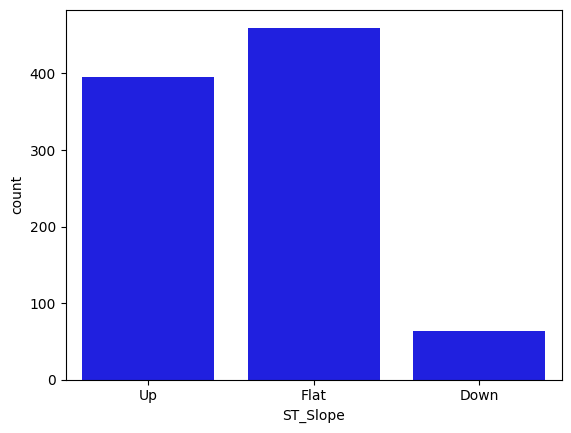

In [118]:
sns.countplot(x='ST_Slope', data=data, color='blue')

<Axes: xlabel='HeartDisease', ylabel='count'>

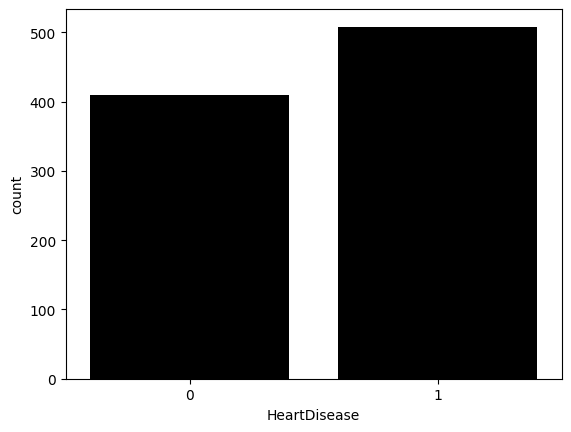

In [119]:
sns.countplot(x='HeartDisease', data=data, color='black')

<Axes: >

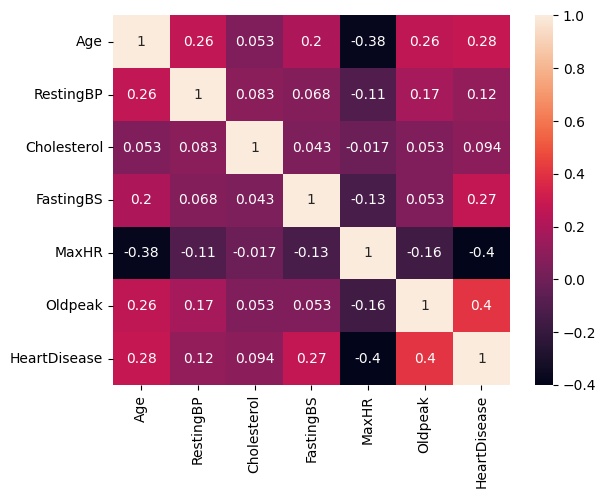

In [120]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

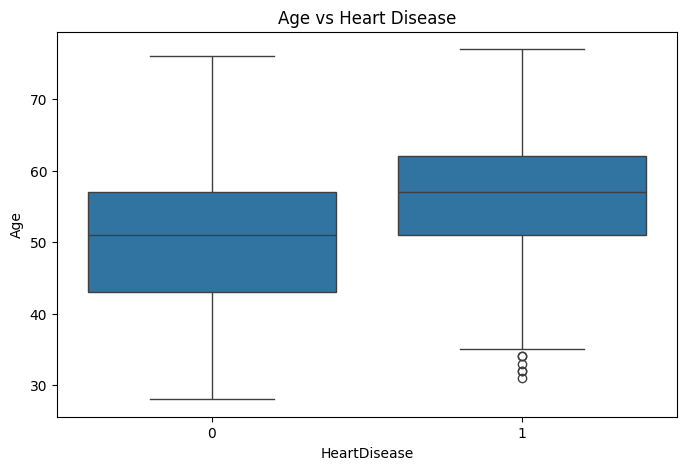

In [121]:
plt.figure(figsize=(8,5))
sns.boxplot(x="HeartDisease", y="Age", data=data)
plt.title("Age vs Heart Disease")
plt.show()


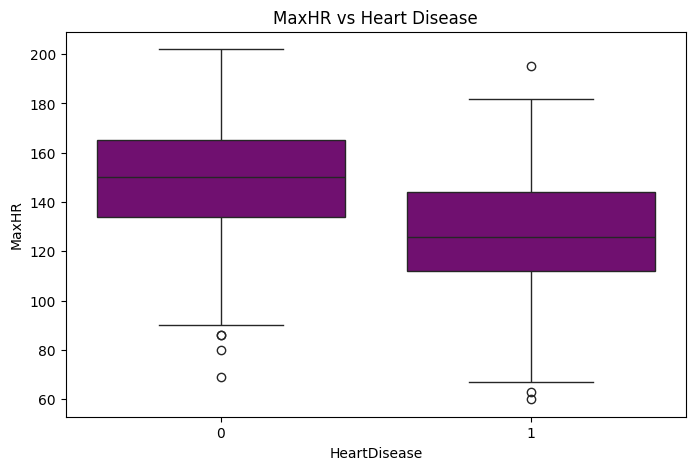

In [122]:
plt.figure(figsize=(8,5))
sns.boxplot(x="HeartDisease", y="MaxHR", data=data, color='purple')
plt.title("MaxHR vs Heart Disease")
plt.show()


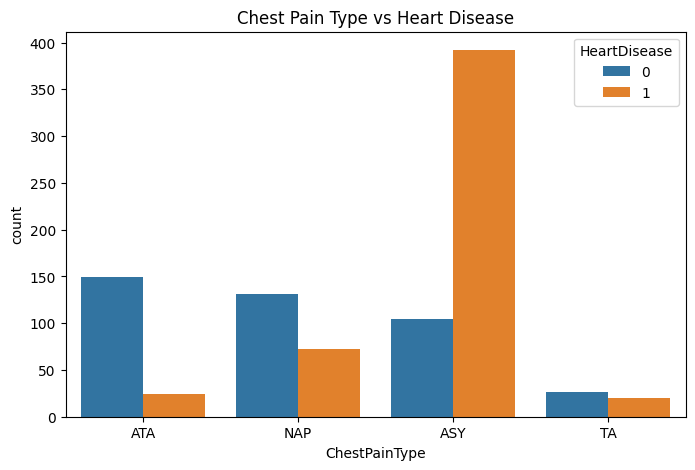

In [123]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x="ChestPainType", hue="HeartDisease")
plt.title("Chest Pain Type vs Heart Disease")
plt.show()


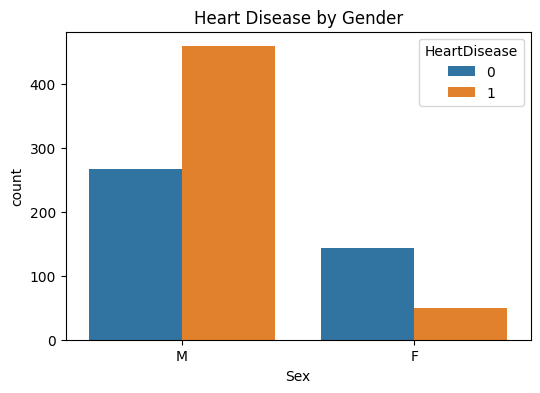

In [124]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x="Sex", hue="HeartDisease")
plt.title("Heart Disease by Gender")
plt.show()


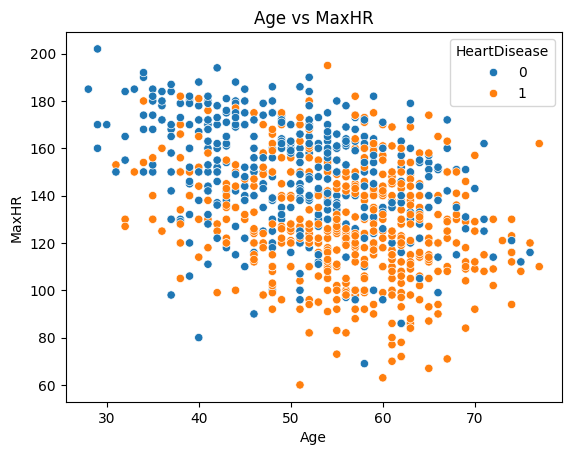

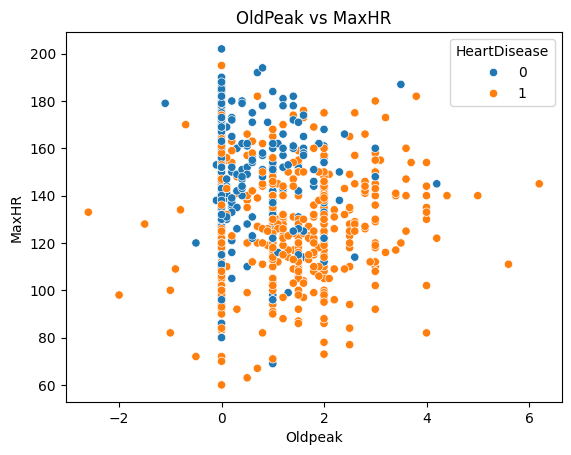

In [125]:
sns.scatterplot(data=data, x="Age", y="MaxHR", hue="HeartDisease")
plt.title("Age vs MaxHR")
plt.show()

sns.scatterplot(data=data, x="Oldpeak", y="MaxHR", hue="HeartDisease")
plt.title("OldPeak vs MaxHR")
plt.show()


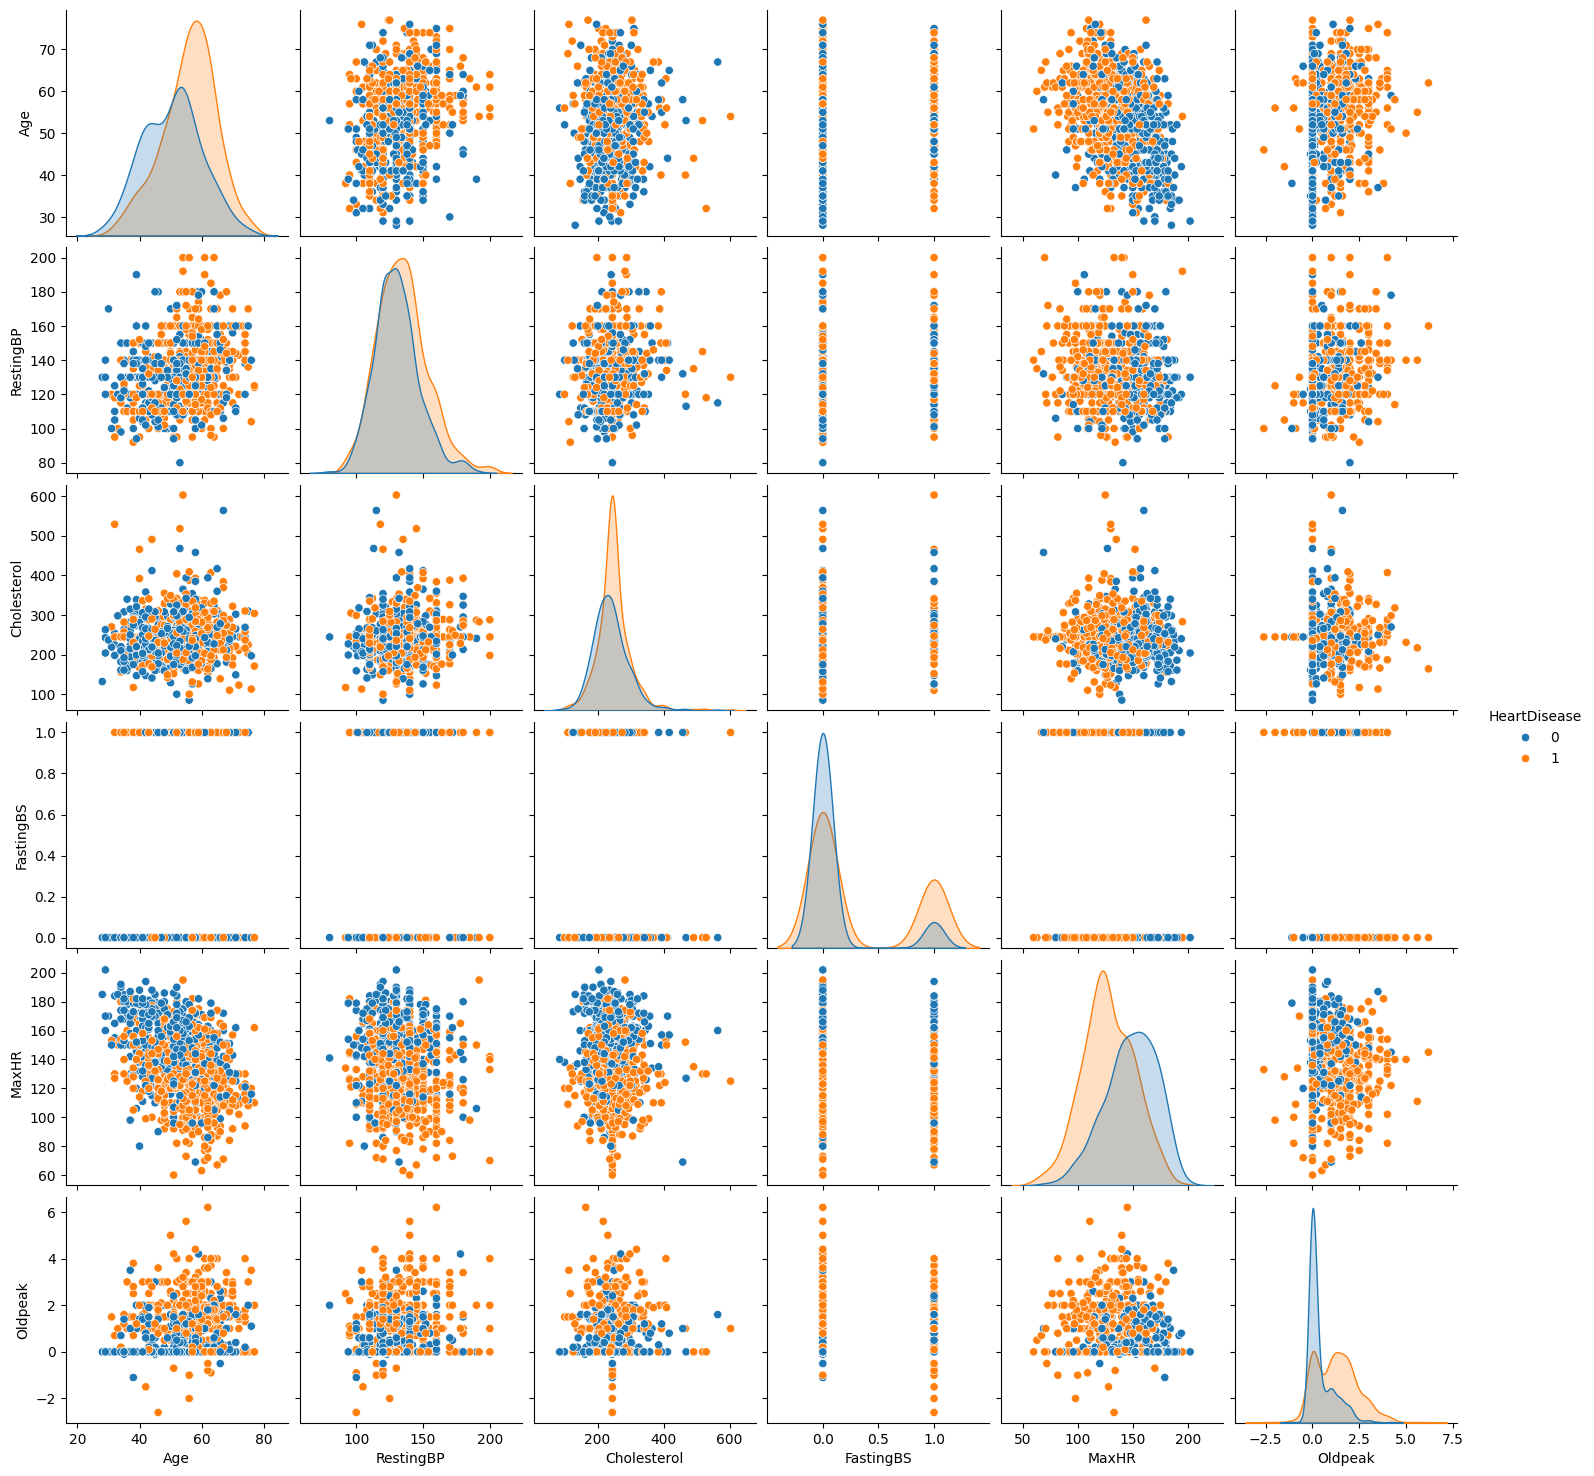

In [126]:
sns.pairplot(data, hue="HeartDisease")
plt.show()


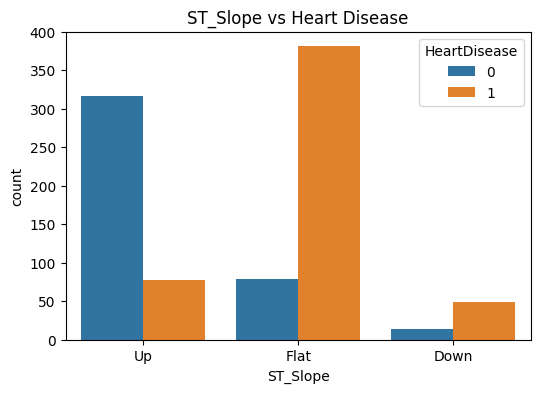

In [127]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x="ST_Slope", hue="HeartDisease")
plt.title("ST_Slope vs Heart Disease")
plt.show()


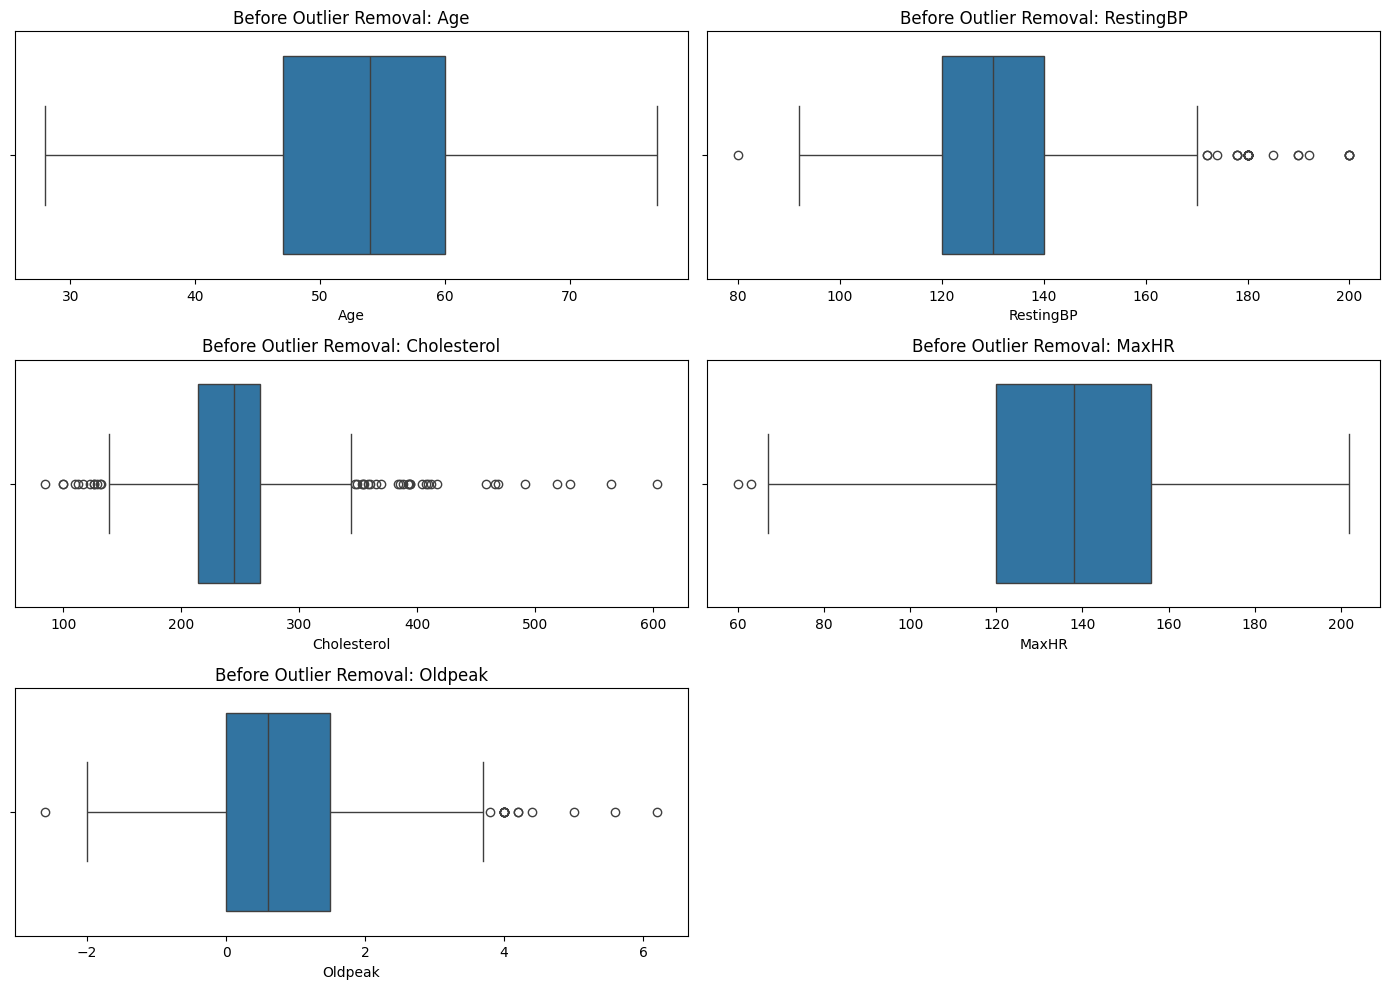

In [128]:
num_colss = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(14, 10))
for i, col in enumerate(num_colss, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=data[col])
    plt.title(f"Before Outlier Removal: {col}")

plt.tight_layout()
plt.show()

In [130]:
def remove_outliers_IQR(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"\n Column: {col}")
    print(f"   Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
    print(f"   Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")

    before = data.shape[0]
    cleaned_data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    after = cleaned_data.shape[0]

    print(f"   Removed {before - after} outliers")

    return cleaned_data

In [131]:
df_clean = data.copy()

for col in num_colss:
    df_clean = remove_outliers_IQR(df_clean, col)

print("\nDataset shape before:", data.shape)
print("Dataset shape after IQR removal:", df_clean.shape)




 Column: Age
   Q1 = 47.0, Q3 = 60.0, IQR = 13.0
   Lower Bound = 27.5, Upper Bound = 79.5
   Removed 0 outliers

 Column: RestingBP
   Q1 = 120.0, Q3 = 140.0, IQR = 20.0
   Lower Bound = 90.0, Upper Bound = 170.0
   Removed 27 outliers

 Column: Cholesterol
   Q1 = 214.0, Q3 = 265.5, IQR = 51.5
   Lower Bound = 136.75, Upper Bound = 342.75
   Removed 40 outliers

 Column: MaxHR
   Q1 = 119.5, Q3 = 156.0, IQR = 36.5
   Lower Bound = 64.75, Upper Bound = 210.75
   Removed 2 outliers

 Column: Oldpeak
   Q1 = 0.0, Q3 = 1.5, IQR = 1.5
   Lower Bound = -2.25, Upper Bound = 3.75
   Removed 13 outliers

Dataset shape before: (918, 12)
Dataset shape after IQR removal: (836, 12)


In [ ]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_colss, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df_clean[col])
    plt.title(f"After Outlier Removal: {col}")

plt.tight_layout()
plt.show()

In [132]:
from scipy.stats import chi2_contingency

cat_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG',
            'ExerciseAngina', 'ST_Slope']

print("\n================= CHI-SQUARE TEST RESULTS =================")

for col in cat_cols:
    print(f"\n Feature: {col}")

    contingency = pd.crosstab(df_clean[col], df_clean['HeartDisease'])

    chi2, p_value, dof, expected = chi2_contingency(contingency)

    print("Chi-square Value:", chi2)
    print("p-value:", p_value)
    print("Degrees of freedom:", dof)

    if p_value < 0.05:
        print("Result: SIGNIFICANT relationship with Heart Disease ")
    else:
        print("Result: NOT significant")



================= CHI-SQUARE TEST RESULTS =================

 Feature: Sex
Chi-square Value: 82.57040487822327
p-value: 1.0197249391981273e-19
Degrees of freedom: 1
Result: SIGNIFICANT relationship with Heart Disease 

 Feature: ChestPainType
Chi-square Value: 251.436277721305
p-value: 3.200199957822411e-54
Degrees of freedom: 3
Result: SIGNIFICANT relationship with Heart Disease 

 Feature: FastingBS
Chi-square Value: 65.33381633308367
p-value: 6.322702922257023e-16
Degrees of freedom: 1
Result: SIGNIFICANT relationship with Heart Disease 

 Feature: RestingECG
Chi-square Value: 11.193819579148881
p-value: 0.0037093085678838417
Degrees of freedom: 2
Result: SIGNIFICANT relationship with Heart Disease 

 Feature: ExerciseAngina
Chi-square Value: 203.71281617699958
p-value: 3.2333190485608125e-46
Degrees of freedom: 1
Result: SIGNIFICANT relationship with Heart Disease 

 Feature: ST_Slope
Chi-square Value: 317.5582760233567
p-value: 1.104324024130953e-69
Degrees of freedom: 2
Result: 

In [133]:
df_clean.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [134]:
data_encode = pd.get_dummies(df_clean)
data_encode = data_encode.astype(int)
data_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [135]:
x= data_encode.drop('HeartDisease', axis=1)
# x.head()
y = data_encode['HeartDisease']
y.head()



0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [136]:
x.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [137]:
from sklearn.preprocessing import StandardScaler
numeric_col = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scale = StandardScaler()
x[numeric_col] = scale.fit_transform(x[numeric_col])
x.head()
x.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.407680,0.583285,1.232340,0,1.376099,-0.749128,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,-0.455218,1.853806,-1.497260,0,0.742914,0.379288,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,-1.725168,-0.051976,1.082087,0,-1.552384,-0.749128,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,-0.561047,0.456233,-0.645825,0,-1.156643,0.379288,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0.073929,1.218545,-1.121627,0,-0.602606,-0.749128,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.15 , random_state=42)

model = LogisticRegression()
model = model.fit(xtrain,ytrain)
y_pred = model.predict(xtest)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [139]:
acc = accuracy_score(ytest,y_pred)
print(f"Accuracy of model is {acc}")

Accuracy of model is 0.8888888888888888


In [140]:
classreport = classification_report(ytest,y_pred)
print(classreport)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        63
           1       0.87      0.92      0.89        63

    accuracy                           0.89       126
   macro avg       0.89      0.89      0.89       126
weighted avg       0.89      0.89      0.89       126



In [141]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model , x , y, cv=4 , scoring ='accuracy')

In [142]:
print(score)

[0.88995215 0.88038278 0.86124402 0.73205742]


In [143]:
print(score.mean())

0.8409090909090909


[[54  9]
 [ 5 58]]


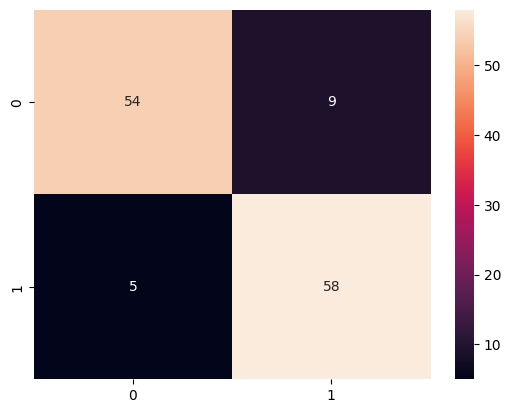

In [144]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
print(cm)

In [145]:
RF_model = RandomForestClassifier(random_state=42, max_depth=8, min_samples_leaf=5)
RF_model = RF_model.fit(xtrain,ytrain)
Y_Pred_RF = RF_model.predict(xtest)

In [146]:
classreport_RF = classification_report(ytest,Y_Pred_RF)
print(classreport_RF)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        63
           1       0.90      0.95      0.92        63

    accuracy                           0.92       126
   macro avg       0.92      0.92      0.92       126
weighted avg       0.92      0.92      0.92       126



In [147]:
score_RF = cross_val_score(RF_model , x , y, cv=4 , scoring ='accuracy')
print(f"CV Average is:", score_RF.mean())

CV Average is: 0.8552631578947368


[[56  7]
 [ 3 60]]


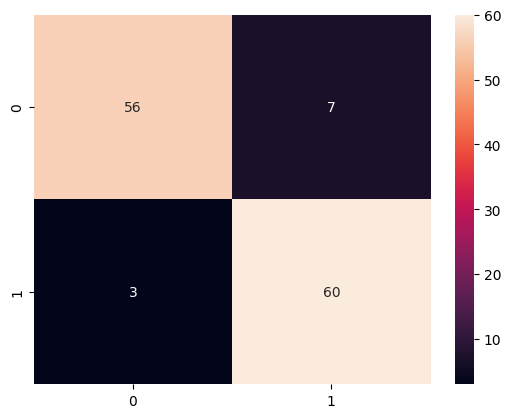

In [148]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,Y_Pred_RF)
sns.heatmap(cm,annot=True,fmt='d')
print(cm)

In [153]:
data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

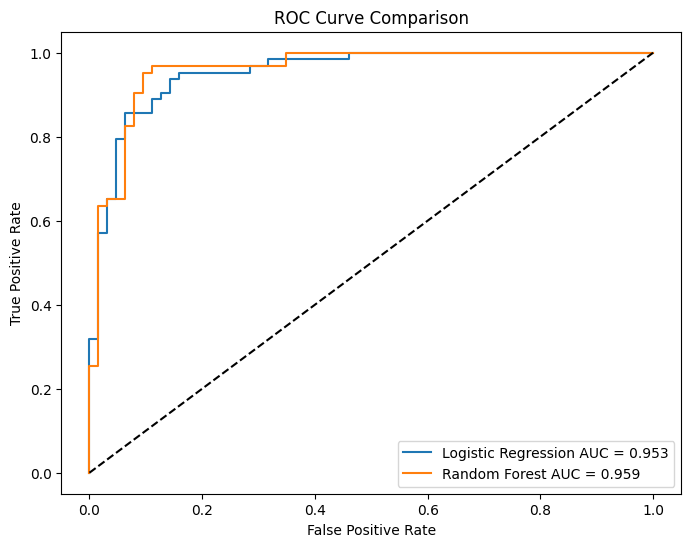

In [149]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob_lr = model.predict_proba(xtest)[:,1]

y_prob_rf = RF_model.predict_proba(xtest)[:,1]

fpr_lr, tpr_lr, _ = roc_curve(ytest, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(ytest, y_prob_rf)

auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression AUC = {auc_lr:.3f}")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest AUC = {auc_rf:.3f}")
plt.plot([0,1],[0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

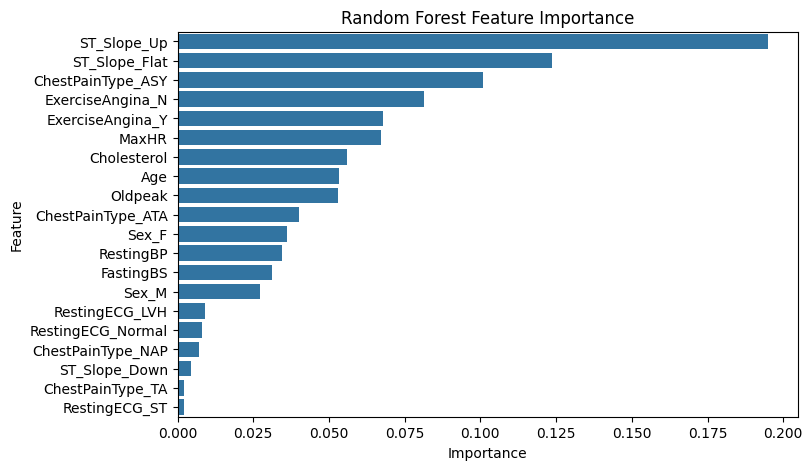

,Feature,Importance
19,ST_Slope_Up,0.194979
18,ST_Slope_Flat,0.123721
8,ChestPainType_ASY,0.100929
15,ExerciseAngina_N,0.081469
16,ExerciseAngina_Y,0.068004
4,MaxHR,0.067164
2,Cholesterol,0.055863
0,Age,0.053351
5,Oldpeak,0.052994
9,ChestPainType_ATA,0.039980


In [151]:
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': RF_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Random Forest Feature Importance")
plt.show()

feature_importance

In [154]:
# Save the trained model as a .pkl file
import pickle
with open('../frontend/models/random_forest_model.pkl', 'wb') as f:
    pickle.dump(RF_model, f)

In [155]:

import pickle

# This saves the 'scale' object you already created in Cell 12/17
with open('../frontend/models/scaler.pkl', 'wb') as f:
    pickle.dump(scale, f)

print("Scaler saved! Now your app.py can 'translate' website data correctly.")

Scaler saved! Now your app.py can 'translate' website data correctly.
